In [1]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import silhouette_score, silhouette_samples
#import matplotlib.ticker as ticker
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import norm
import itertools
import networkx as nx
import plotly.figure_factory as ff
from itertools import combinations
from IPython.display import display
from pacmap import PaCMAP
from scipy.cluster.hierarchy import linkage, fcluster

In [16]:
pipeline= "sanger_raw_pindel"

In [17]:
cancer_type = "Brain"
non_coding_region = 'acceptor'
file_name = "df_log_odd_score_{}.tsv".format(pipeline)

In [18]:
file_path= '/home/pdutta/Data/Cancer_wiseGDC/New_data/{}/Generated_files/Variant_Analysis/{}/{}'.format(cancer_type, non_coding_region, file_name)
output_path = "/home/pdutta/Data/Cancer_wiseGDC/New_data/Brain/Generated_files/Kmeans_cluster/acceptor/Categorise_{}/".format(pipeline)
# Subfolders within the base path

In [19]:
df = pd.read_csv(file_path, sep='\t', index_col=0)
df = df.set_index('Patient_ID', drop=True)
df

,chr1_11988386_11988465_11988402_11988403_G_GTT,chr1_16041210_16041289_16041214_16041215_G_GCATGAGC,chr1_17334283_17334362_17334306_17334307_A_AT,chr1_17334283_17334362_17334306_17334307_A_ATT,chr1_47225850_47225929_47225895_47225900_GCAGA_G,chr1_54204977_54205056_54204984_54204988_CCTT_C,chr1_54227121_54227200_54227180_54227181_A_AGG,chr1_54977823_54977902_54977864_54977865_G_GAAA,chr1_59021086_59021165_59021103_59021104_A_AT,chr1_66612016_66612095_66612025_66612029_GAGA_G,...,chr8_126848479_126848558_126848485_126848488_CAA_C,chr9_15888942_15889021_15888948_15888952_CTTT_C,chr9_77205272_77205351_77205285_77205287_CT_C,chr9_83855015_83855094_83855038_83855041_CTT_C,chrX_118447019_118447098_118447031_118447034_ATT_A,chr15_50930764_50930843_50930781_50930782_G_GT,chr6_42619427_42619506_42619448_42619457_ATATATTTT_A,chr16_35244229_35244308_35244269_35244270_G_C,chr22_24627811_24627890_24627822_24627823_G_A,chr6_32522135_32522214_32522156_32522157_C_A
Patient_ID,,,,,,,,,,,,,,,,,,,,,
a5867fd1-4897-4559-855a-c30002d3c6bb_sanger_raw_pindel,0.415223,-0.926558,0.868682,0.527129,0.272972,-0.999906,0.164135,-0.278651,-0.998459,-0.997458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0f158d5f-16c7-4fb7-b48c-0ff392f1706b_sanger_raw_pindel,NaN,-0.926558,NaN,0.527129,0.272972,NaN,0.164135,-0.278651,-0.998459,-0.997458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
af56a9e4-b896-4d47-b9c0-930eb68862bd_sanger_raw_pindel,NaN,-0.926558,NaN,0.527129,0.272972,NaN,0.164135,-0.278651,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
447a08c8-3488-45d1-9262-23c42341296f_sanger_raw_pindel,NaN,-0.926558,0.868682,0.527129,0.272972,NaN,NaN,-0.278651,-0.998459,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
033db366-1af1-4bd9-8339-c54800b1de57_sanger_raw_pindel,NaN,-0.926558,NaN,0.527129,NaN,NaN,NaN,-0.278651,NaN,-0.997458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
03c1c33e-c4a8-4c31-8a29-0d8b3e7bda83_sanger_raw_pindel,0.415223,-0.926558,NaN,0.527129,NaN,NaN,0.164135,-0.278651,-0.998459,-0.997458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
812d6f3d-c4f9-4e10-9039-4ebe9b3100c3_sanger_raw_pindel,NaN,-0.926558,NaN,0.527129,0.272972,NaN,0.164135,-0.278651,-0.998459,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ca52ea0e-5021-463b-8821-5e7c765812ff_sanger_raw_pindel,NaN,-0.926558,NaN,0.527129,NaN,NaN,0.164135,NaN,-0.998459,-0.997458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


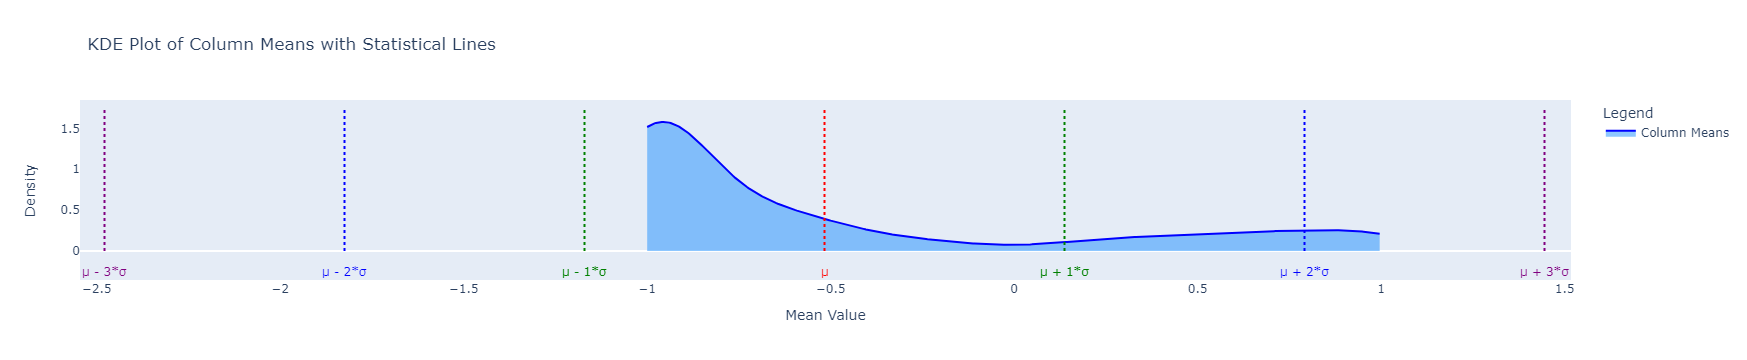

In [20]:
# Assuming 'df' is your DataFrame
# Calculate the mean for each numeric column, ignoring NaN values
means = df.select_dtypes(include=[np.number]).mean()

# Compute overall mean and standard deviation of these means
overall_mean = means.mean()
overall_std = means.std()

# Create a simple KDE plot using Plotly's Figure Factory
fig = ff.create_distplot([means.dropna()], ['Column Means'], show_hist=False, show_rug=False)

# Add vertical lines for mean and mean ± standard deviations
lines = [overall_mean, overall_mean - overall_std, overall_mean + overall_std,
         overall_mean - 2 * overall_std, overall_mean + 2 * overall_std,
         overall_mean - 3 * overall_std, overall_mean + 3 * overall_std]
colors = ['red', 'green', 'green', 'blue', 'blue', 'purple', 'purple']
names = ['μ', 'μ - 1*σ', 'μ + 1*σ', 'μ - 2*σ', 'μ + 2*σ', 'μ - 3*σ', 'μ + 3*σ']
line_style = dict(dash='dot', width=2)

# Update density plot to have a filled color with transparency
fig.data[0].update(
    marker=dict(color='blue', line=dict(width=0)),
    fill='tozeroy',
    fillcolor='rgba(30,144,255,0.5)'
)

# Max density for y-scale of lines
max_density = fig.data[0].y.max() * 1.1  # Scale it a bit for visual clarity

# Add dotted vertical lines and x-axis annotations for the statistical measures
for line, color, name in zip(lines, colors, names):
    fig.add_trace(go.Scatter(
        x=[line, line],
        y=[0, max_density],  # Extend from 0 to max density for visibility
        mode='lines',
        line=dict(color=color, **line_style),
        name=name
    ))

    # Add annotations directly on the x-axis for each line
    fig.add_annotation(
        x=line, y=0,
        text=name,
        showarrow=False,
        yshift=-20,
        xshift=-5 if 'Mean' in name else 0,
        font=dict(color=color)
    )

# Remove legend for vertical lines
fig.for_each_trace(
    lambda trace: trace.update(showlegend=False) if trace.name in names else (),
)

# Update layout for better visualization
fig.update_layout(
    title='KDE Plot of Column Means with Statistical Lines',
    xaxis_title='Mean Value',
    yaxis_title='Density',
    legend_title='Legend',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

# Show the plot
fig.show()

In [21]:
# Define a function to categorize based on the overall mean and standard deviation
def categorize_value(x, overall_mean, overall_std):
    if x == 0:
        return 0
    elif x > overall_mean + overall_std:
        return 1
    elif x < overall_mean - overall_std:
        return -1
    else:
        return 0

In [22]:
def save_plot(fig, filename):
    """ Save the Plotly figure as HTML """
    plot(fig, filename=filename, auto_open=False)

In [23]:
# Custom function to calculate Mean Absolute Deviation
def calculate_mad(column):
    mean = column.mean()
    return (column - mean).abs().mean()

In [24]:
def silhouette_plot(k, cluster_labels, silhouette_avg, sample_silhouette_values, folder_path, top_n_percent):
    fig = go.Figure()
    y_lower = 10  # Initial lower margin for the silhouette plot
    cluster_info = []  # To store info about clusters for the legend

    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cluster_info.append(f"Cluster {i} [{size_cluster_i} patients]")  # Append cluster info for legend

        fig.add_trace(go.Scatter(
            x=ith_cluster_silhouette_values,
            y=np.arange(y_lower, y_upper),
            mode='lines',
            line=dict(width=0.5),
            fill='tozerox',
            name=f'Cluster {i} [{size_cluster_i} patients]'
        ))

        y_lower = y_upper + 10  # Gap between silhouettes

    # Red dashed line for average silhouette score
    fig.add_trace(go.Scatter(
        x=[silhouette_avg, silhouette_avg],
        y=[0, y_lower],
        mode='lines',
        line=dict(color="red", dash='dash', width=2),
        name='Average silhouette score'
    ))

    # Update plot layout
    fig.update_layout(
        title=f'Silhouette Analysis for k={k} Clusters for top {top_n_percent}% features <br>Average silhouette score {silhouette_avg:.4f}',
        xaxis_title='Silhouette Coefficient Values',
        yaxis_title='Cluster Label',
        yaxis=dict(range=[-0.1, y_lower + 10], showticklabels=False),
        showlegend=True
    )

    # Save and display the figure
    fig.write_html(f"{folder_path}/silhouette_plot_k_{k}_top_feature_{top_n_percent}.html")
    #fig.show()

In [25]:
def kmeans_silhouette_score(scaled_data, n_clusters, result_path, original_indices, top_percentage):
    # Initialize and run KMeans clustering with varying number of clusters
    #display(scaled_data)
    kmeans = KMeans(n_clusters=n_clusters, max_iter=300, tol=1e-04, init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    # Calculate and return the silhouette score
    score = silhouette_score(scaled_data, labels)
    sample_silhouette_values = silhouette_samples(scaled_data, labels)
    silhouette_plot(k,labels, score, sample_silhouette_values, result_path, top_percentage)
    

    # Create text files for each cluster
    for i in range(n_clusters):
        cluster_file_path = f"{result_path}/cluster_{i}.txt"
        with open(cluster_file_path, 'w') as file:
            indices = original_indices[labels == i]
            for idx in indices:
                file.write(str(idx) + '\n')
    return score

In [26]:
def data_categorized_mad(data):
    # Assuming 'df' is your DataFrame
    # Calculate the mean for each numeric column, ignoring NaN values
    means = data.select_dtypes(include=[np.number]).mean()
    
    # Compute overall mean and standard deviation of these means
    overall_mean = means.mean()
    overall_std = means.std()
    
    # Replace NaN values with 0
    data.fillna(0, inplace=True)
    
    # Apply the categorization function to each element of the dataframe
    for col in data.select_dtypes(include=[np.number]).columns:
        data[col] = data[col].apply(lambda x: categorize_value(x, overall_mean, overall_std))
    #display(data)
    # Calculate MAD for each numeric column
    mad_values = {col: calculate_mad(data[col]) for col in data.select_dtypes(include=[np.number]).columns}

    # Sort columns by MAD in descending order
    mad_sorted = sorted(mad_values.items(), key=lambda x: x[1], reverse=True)
    return (data, mad_values, mad_sorted)

In [27]:
data_processed, mad_values, mad_sorted = data_categorized_mad(df)

In [28]:
print("Columns ranked by MAD (in descending order):")
for col, mad in mad_sorted[0:10]:
    print(f"{col}: {mad}")

Columns ranked by MAD (in descending order):
chr17_30786686_30786765_30786696_30786697_A_AATCT: 0.5
chr14_73927066_73927145_73927088_73927089_A_AT: 0.49995713305898487
chr11_33040089_33040168_33040109_33040110_C_CTTT: 0.4996141975308642
chr14_105625340_105625419_105625405_105625407_CA_C: 0.49961419753086417
chr14_36235283_36235362_36235302_36235303_C_CTTTTT: 0.49931412894375854
chr7_118322814_118322893_118322814_118322815_T_TTTTG: 0.4989283264746228
chr20_62733143_62733222_62733162_62733163_A_ACGTTCTTT: 0.4965277777777778
chr11_57350284_57350363_57350295_57350296_C_CTTTTTT: 0.4957133058984911
chr16_732617_732696_732643_732644_C_CT: 0.4948131001371743
chr19_39886546_39886625_39886592_39886594_GG_C: 0.49481310013717417


Code is running for Cluster 2
Code is running for Cluster 3
Code is running for Cluster 4
Code is running for Cluster 5


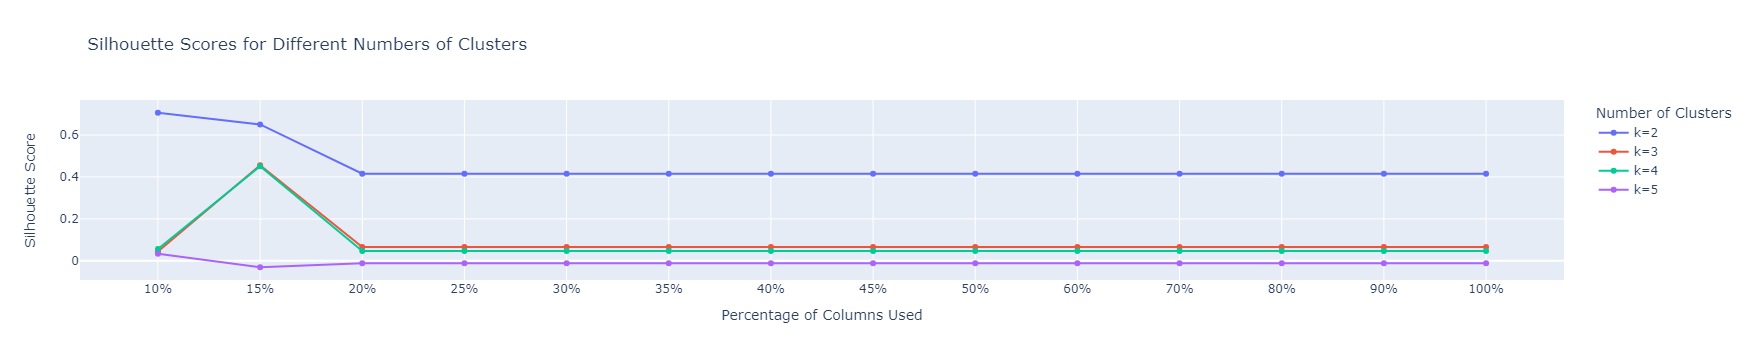

In [29]:
# List of percentages representing parts of the total columns to use for clustering
percentages = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Setup Plotly figure
fig = go.Figure()
# Loop over different values of k for clusters
for k in range(2, 6):  # k varies from 2 to 5
    print("Code is running for Cluster", k)
    cluster_path = f"{output_path}/{k}_Clusters"
    if not os.path.exists(cluster_path):
        os.makedirs(cluster_path)
    silhouette_scores = []
    for p in percentages:
        num_columns = int(len(mad_sorted) * p)
        top_columns = [col[0] for col in mad_sorted[:num_columns]]

        # Directory for the current percentage
        percentage_path = f"{cluster_path}/top_percentage_{int(p * 100)}"
        if not os.path.exists(percentage_path):
            os.makedirs(percentage_path)
        
        # Store top features for current percentage
        features_path = f"{percentage_path}/top_features.txt"
        with open(features_path, 'w') as file:
            for col in top_columns:
                file.write(col + '\n')
        

        #The selected columns are standardized using StandardScaler. This ensures that each feature contributes equally to the distance computations 
        #in the KMeans algorithm, which is crucial because KMeans is sensitive to the scales of the input features.
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(data_processed[top_columns])
        #print("Scaled_data : ", scaled_data.shape[1])  # Output the number of features after scaling
        original_indices = data_processed.index  # Capture the original indices before scaling
    
    
        # This step reduces the number of dimensions in the data by transforming it to a new basisvwhere the variance retained is as specified (90% in this case). The goal is to reduce
        # complexity while keeping the most informative aspects of the data.  Apply PCA to reduce dimensionality while retaining 90% of the variance:
        # pca = PCA(n_components=0.90)  # Initialize PCA to retain 90% of the variance
        # data_reduced = pca.fit_transform(scaled_data)
        # print("Reduced to %d dimensions" % data_reduced.shape[1]) 
        
        # Compute silhouette score for the current number of clusters and percentage of columns
        score = kmeans_silhouette_score(scaled_data, k, percentage_path, original_indices, p)
        silhouette_scores.append(score)
    
    # Add the silhouette scores to the plot for the current number of clusters
    fig.add_trace(go.Scatter(
        x=[f"{int(p * 100)}%" for p in percentages],
        y=silhouette_scores,
        mode='lines+markers',
        name=f'k={k}'
    ))

# Update plot layout
fig.update_layout(
    title="Silhouette Scores for Different Numbers of Clusters",
    xaxis_title="Percentage of Columns Used",
    yaxis_title="Silhouette Score",
    legend_title="Number of Clusters"
)

# Show the plot
fig.show()

# Apply Hierarchical clustering

In [42]:
num_columns = int(len(mad_sorted) * 0.15)
top_columns = [col[0] for col in mad_sorted[:num_columns]]

In [43]:
num_columns

505

In [44]:
data_processed[top_columns]

,chr17_30786686_30786765_30786696_30786697_A_AATCT,chr14_73927066_73927145_73927088_73927089_A_AT,chr11_33040089_33040168_33040109_33040110_C_CTTT,chr14_105625340_105625419_105625405_105625407_CA_C,chr14_36235283_36235362_36235302_36235303_C_CTTTTT,chr7_118322814_118322893_118322814_118322815_T_TTTTG,chr20_62733143_62733222_62733162_62733163_A_ACGTTCTTT,chr11_57350284_57350363_57350295_57350296_C_CTTTTTT,chr16_732617_732696_732643_732644_C_CT,chr19_39886546_39886625_39886592_39886594_GG_C,...,chr5_118561964_118562043_118561977_118561981_TCTC_T,chr9_129294158_129294237_129294184_129294185_A_AT,chr10_13654048_13654127_13654077_13654078_T_TA,chr11_56104827_56104906_56104852_56104858_TTTTTG_T,chr22_42880583_42880662_42880609_42880614_CACTT_C,chr6_75757958_75758037_75757971_75757972_C_CTTT,chr6_25553968_25554047_25553990_25553992_CT_C,chr18_8361052_8361131_8361058_8361060_CT_C,chr15_68719103_68719182_68719104_68719105_G_GC,chr22_44093891_44093970_44093897_44093899_AC_A
Patient_ID,,,,,,,,,,,,,,,,,,,,,
a5867fd1-4897-4559-855a-c30002d3c6bb_sanger_raw_pindel,0,1,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
0f158d5f-16c7-4fb7-b48c-0ff392f1706b_sanger_raw_pindel,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
af56a9e4-b896-4d47-b9c0-930eb68862bd_sanger_raw_pindel,1,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
447a08c8-3488-45d1-9262-23c42341296f_sanger_raw_pindel,0,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
033db366-1af1-4bd9-8339-c54800b1de57_sanger_raw_pindel,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
03c1c33e-c4a8-4c31-8a29-0d8b3e7bda83_sanger_raw_pindel,0,1,1,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
812d6f3d-c4f9-4e10-9039-4ebe9b3100c3_sanger_raw_pindel,0,1,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
ca52ea0e-5021-463b-8821-5e7c765812ff_sanger_raw_pindel,1,1,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_processed[top_columns])

In [46]:
scaled_data

array([[-1.        ,  1.00930253, -1.02817453, ..., -0.06819943,
        -0.06819943, -0.06819943],
       [ 1.        ,  1.00930253,  0.97259753, ..., -0.06819943,
        -0.06819943, -0.06819943],
       [ 1.        ,  1.00930253, -1.02817453, ..., -0.06819943,
        -0.06819943, -0.06819943],
       ...,
       [ 1.        ,  1.00930253, -1.02817453, ..., -0.06819943,
        -0.06819943, -0.06819943],
       [-1.        , -0.99078321,  0.97259753, ..., -0.06819943,
        -0.06819943, -0.06819943],
       [-1.        , -0.99078321,  0.97259753, ..., -0.06819943,
        -0.06819943, -0.06819943]])

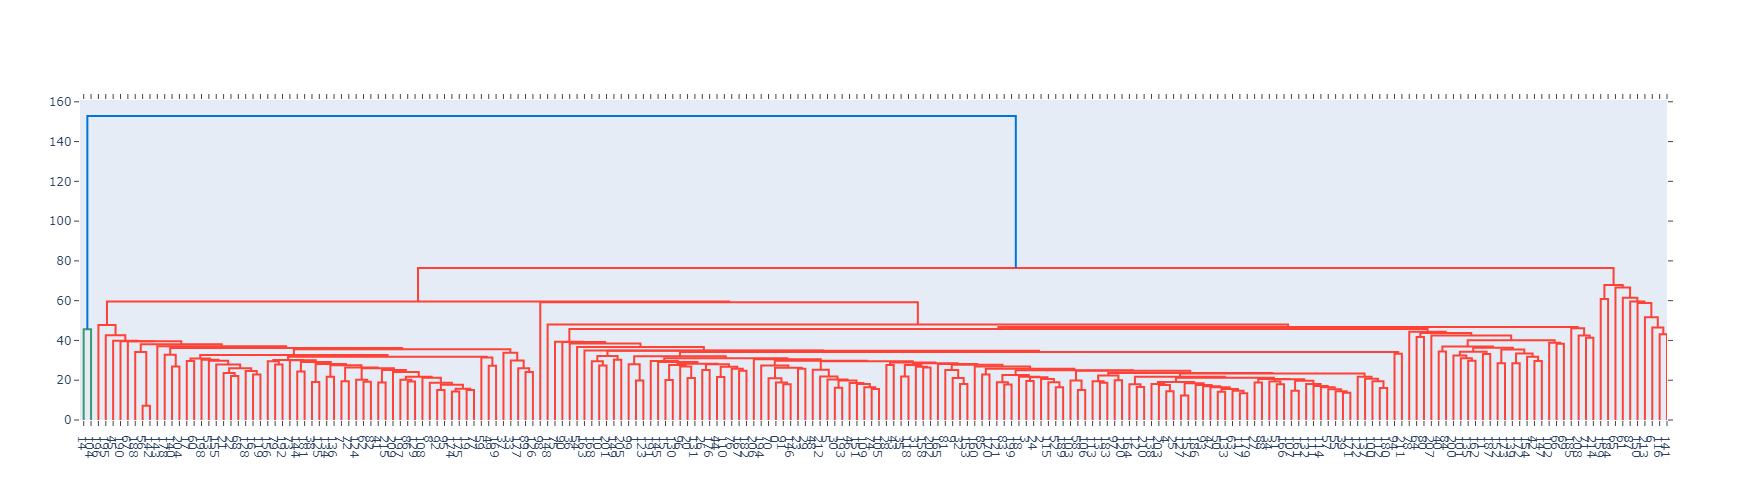

Silhouette Score for k=2: 0.6503999397768441
Silhouette Score for k=3: 0.3925174528097656
Silhouette Score for k=4: 0.375713319579323
Silhouette Score for k=5: 0.36427905632621815


In [47]:
# Compute the linkage matrix using the Ward method
linked = linkage(scaled_data, method='ward')

# Plot the dendrogram
fig = ff.create_dendrogram(scaled_data, linkagefun=lambda x: linked, labels=None)
fig.update_layout(width=1800, height=500)
fig.show()

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = {}
for k in range(2, 6):
    # Use fcluster to flatten the dendrogram to 'k' clusters
    labels = fcluster(linked, k, criterion='maxclust')
    score = silhouette_score(scaled_data, labels)
    silhouette_scores[k] = score
    print(f'Silhouette Score for k={k}: {score}')